In [8]:
#import necessary Python libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

In [20]:
#read the dataset
data = pd.read_csv('Tesla_Latest_Stock_Data.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [6]:
#check for null values
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2845.000000,2845.000000,2845.000000,2845.000000,2.845000e+03,2845.0,2845.000000
mean,105.797199,107.959321,103.485805,105.853488,3.145634e+07,0.0,0.001757
std,188.691743,192.434544,184.592519,188.788993,2.845125e+07,0.0,0.093741
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05,0.0,0.000000
25%,10.352000,10.748000,10.132000,10.400000,1.252200e+07,0.0,0.000000
50%,45.868000,46.493999,45.099998,45.902000,2.482100e+07,0.0,0.000000
75%,65.000000,66.251999,63.993999,65.234001,4.014650e+07,0.0,0.000000
max,891.380005,900.400024,871.599976,883.090027,3.046940e+08,0.0,5.000000


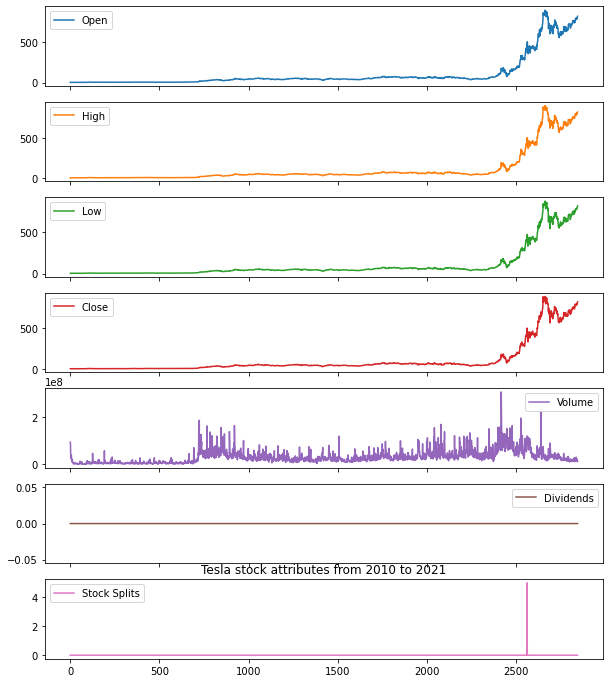

In [22]:
#data visulization
data.plot(subplots=True, figsize=(10,12))
plt.title('Tesla stock attributes from 2010 to 2021')
plt.savefig('stocks.png')
plt.show()